<a href="https://colab.research.google.com/github/Ronaldo-khagokpam/DEEP-LEARNING/blob/main/fruits_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Archive:  fruits.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of fruits.zip or
        fruits.zip.zip, and cannot find fruits.zip.ZIP, period.
Found 66 files belonging to 3 classes.
Found 66 files belonging to 3 classes.
Found 66 files belonging to 3 classes.
Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 188ms/step - accuracy: 0.2752 - loss: 1.1302 - val_accuracy: 0.3333 - val_loss: 1.0722
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 156ms/step - accuracy: 0.3676 - loss: 1.0687 - val_accuracy: 0.5455 - val_loss: 1.0297
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - accuracy: 0.5138 - loss: 1.0233 - val_accuracy: 0.5455 - val_loss: 0.9752
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 163ms/step - accuracy: 0.5653 - loss: 0.9628 - val_accuracy: 0.5

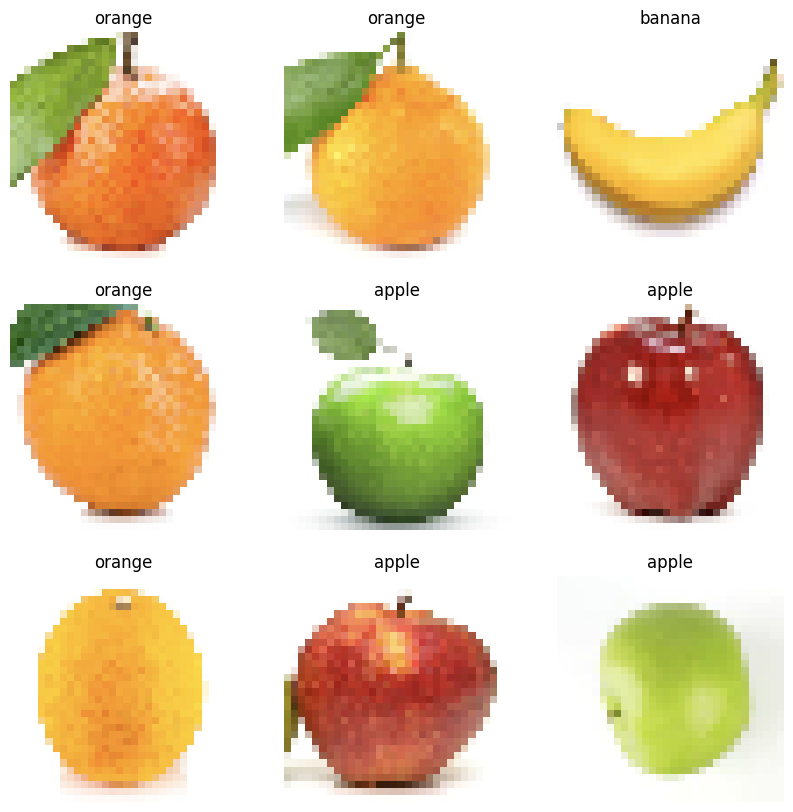

<Figure size 1000x1000 with 0 Axes>

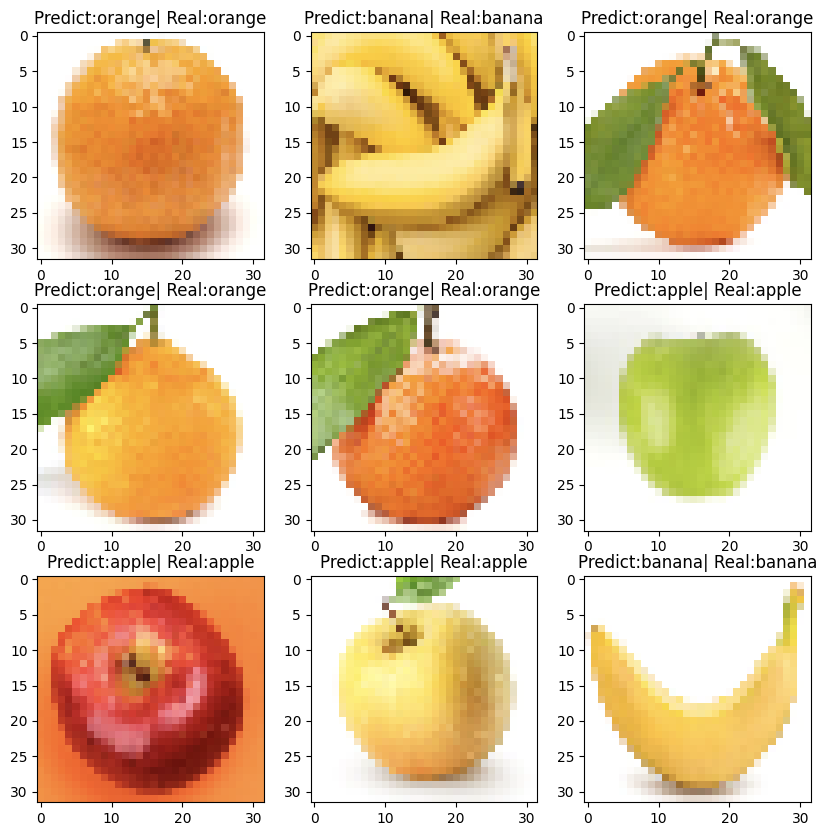

In [9]:
!unzip fruits.zip

import tensorflow as tf
import matplotlib.pyplot as plt

img_height,img_width=32,32
batch_size=20
train_ds=tf.keras.utils.image_dataset_from_directory(
"fruits/train",
 image_size=(img_height,img_width),
 batch_size=batch_size
)
validation_ds=tf.keras.utils.image_dataset_from_directory(
"fruits/validation",
 image_size=(img_height,img_width),
 batch_size=batch_size
)
test_ds=tf.keras.utils.image_dataset_from_directory(
"fruits/test",
 image_size=(img_height,img_width),
 batch_size=batch_size
)

class_names=["apple","banana","orange"]
plt.figure(figsize=(10,10))
for images,labels in train_ds.take(1):
  for i in range(9):
    ax=plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

model=tf.keras.Sequential(
    [
        tf.keras.layers.Rescaling(1./255),
        tf.keras.layers.Conv2D(32,3,activation="relu"),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(32,3,activation="relu"),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(32,3,activation="relu"),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128,activation="relu"),
        tf.keras.layers.Dense(3)
     ]
)

model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

model.fit(
    train_ds,
    validation_data=validation_ds,
    epochs=10
)

model.evaluate(test_ds)

plt.figure(figsize=(10,10))
for images,labels in test_ds.take(1):
  classifications=model(images)
  print(classifications)


import numpy
plt.figure(figsize=(10,10))
for images,labels in test_ds.take(1):
  classifications=model(images)
  for i in range(9):
    ax=plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index=numpy.argmax(classifications[i])
    plt.title("Predict:"+class_names[index]+"| Real:"+class_names[labels[i]])


converter=tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model=converter.convert()
with open('model.tflite','wb') as f:
  f.write(tflite_model)

In [8]:
!unzip fruits.zip

Archive:  fruits.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of fruits.zip or
        fruits.zip.zip, and cannot find fruits.zip.ZIP, period.


In [7]:
!unzip fruits.zip

import tensorflow as tf
import matplotlib.pyplot as plt

img_height,img_width=32,32
batch_size=20
train_ds=tf.keras.utils.image_dataset_from_directory(
"fruits/train",
 image_size=(img_height,img_width),
 batch_size=batch_size
)
validation_ds=tf.keras.utils.image_dataset_from_directory(
"fruits/validation",
 image_size=(img_height,img_width),
 batch_size=batch_size
)
test_ds=tf.keras.utils.image_dataset_from_directory(
"fruits/test",
 image_size=(img_height,img_width),
 batch_size=batch_size
)

class_names=["apple","banana","orange"]
plt.figure(figsize=(10,10))
for images,labels in train_ds.take(1):
  for i in range(9):
    ax=plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

model=tf.keras.Sequential(
    [
        tf.keras.layers.Rescaling(1./255),
        tf.keras.layers.Conv2D(32,3,activation="relu"),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(32,3,activation="relu"),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(32,3,activation="relu"),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128,activation="relu"),
        tf.keras.layers.Dense(3)
     ]
)

model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

model.fit(
    train_ds,
    validation_data=validation_ds,
    epochs=10
)

model.evaluate(test_ds)

plt.figure(figsize=(10,10))
for images,labels in test_ds.take(1):
  classifications=model(images)
  print(classifications)


import numpy
plt.figure(figsize=(10,10))
for images,labels in test_ds.take(1):
  classifications=model(images)
  for i in range(9):
    ax=plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index=numpy.argmax(classifications[i])
    plt.title("Predict:"+class_names[index]+"| Real:"+class_names[labels[i]])


converter=tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model=converter.convert()
with open('model.tflite','wb') as f:
  f.write(tflite_model)

Archive:  fruits.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of fruits.zip or
        fruits.zip.zip, and cannot find fruits.zip.ZIP, period.


NotFoundError: Could not find directory fruits/train